# Demo script_04 fit simulation data with tolerance

In [1]:
import numpy as np
import xmf

In [ ]:
## 1. Lateral coordinates

x_range = 200e-3 
y_range = 20e-3 
x_num = 201 
y_num = 21 

x1d = np.linspace(-x_range/2, x_range/2, x_num) 
y1d = np.linspace(-y_range/2, y_range/2, y_num) 
x2d, y2d = np.meshgrid(x1d, y1d)

abs_p = 30 
abs_q = 0.3
theta = 30e-3 

x_i = -1e-3 
y_i = -2e-4 
z_i = 3e-7 
alpha = 2e-6 
beta = 1e-5 
gamma = 0.5e-3 

true_params_dict = {
    'p': abs_p,
    'q': abs_q,
    'theta': theta,
    'x_i': x_i,
    'y_i': y_i,
    'z_i': z_i,
    'alpha': alpha,
    'beta': beta,
    'gamma': gamma
}

height_measurement_noise_std = 0.5e-9
slope_measurement_noise_std = 100e-9

input_params_dict = {
    'p': abs_p,
    'q': abs_q,
    'theta': theta
}

tol_dict = {
    'p': 0,
    'q': 0,
    'theta': 0
}

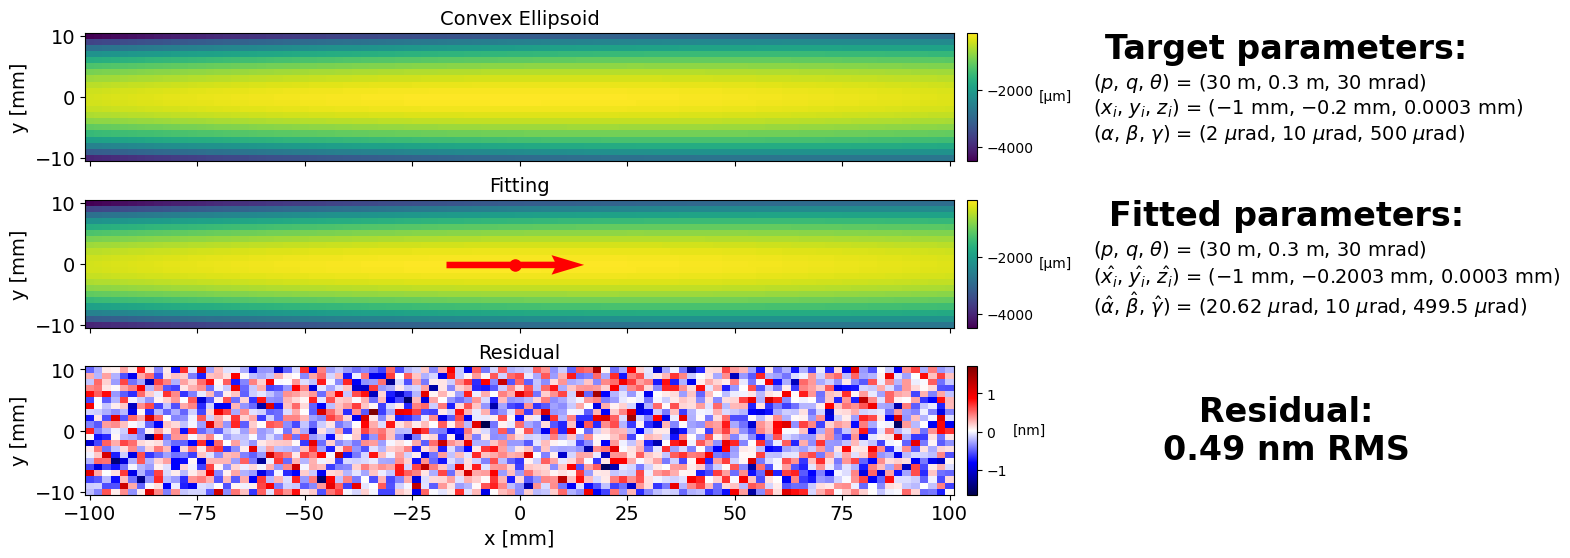

In [3]:
## 2.1. Convex Ellipsoid (CVXE)

z2d = xmf.generate_2d_curved_surface_height(xmf.standard_convex_ellipsoid_height, x2d, y2d, abs_p, abs_q, theta, x_i, y_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_ellipsoid_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Ellipsoid')

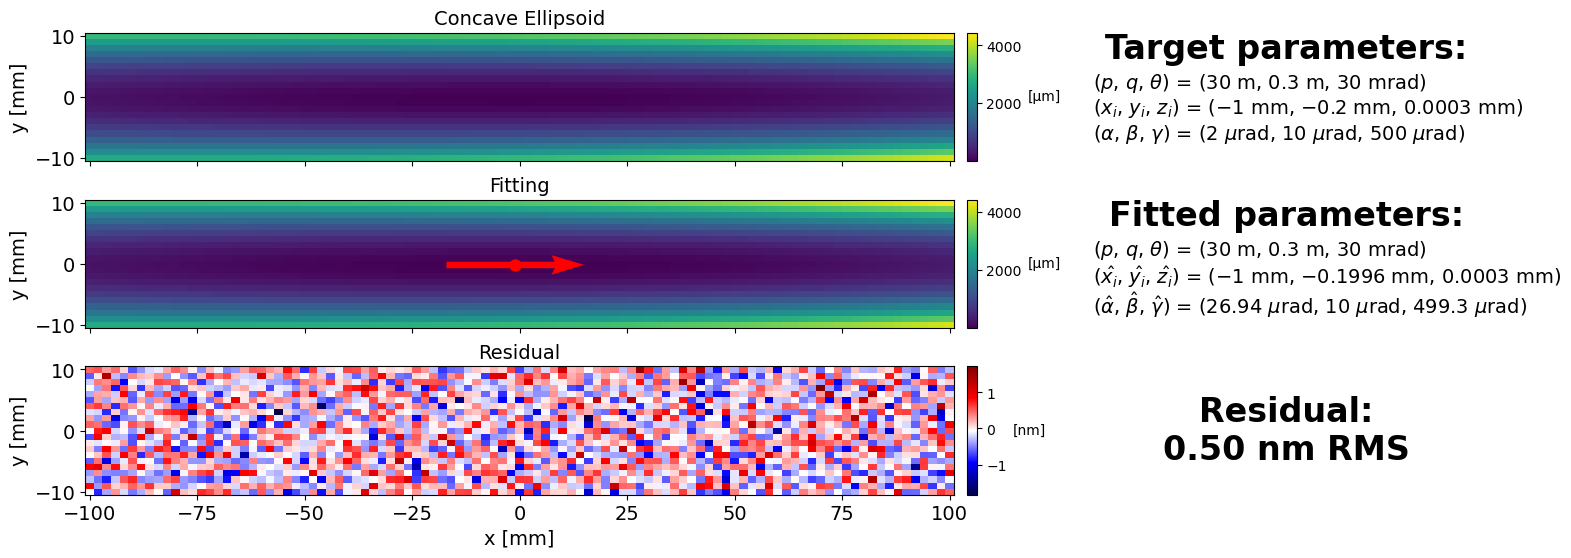

In [4]:
## 2.2. Concave Ellipsoid (CCVE)

z2d = xmf.generate_2d_curved_surface_height(xmf.standard_concave_ellipsoid_height, x2d, y2d, abs_p, abs_q, theta, x_i, y_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_ellipsoid_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict,'Concave Ellipsoid') 


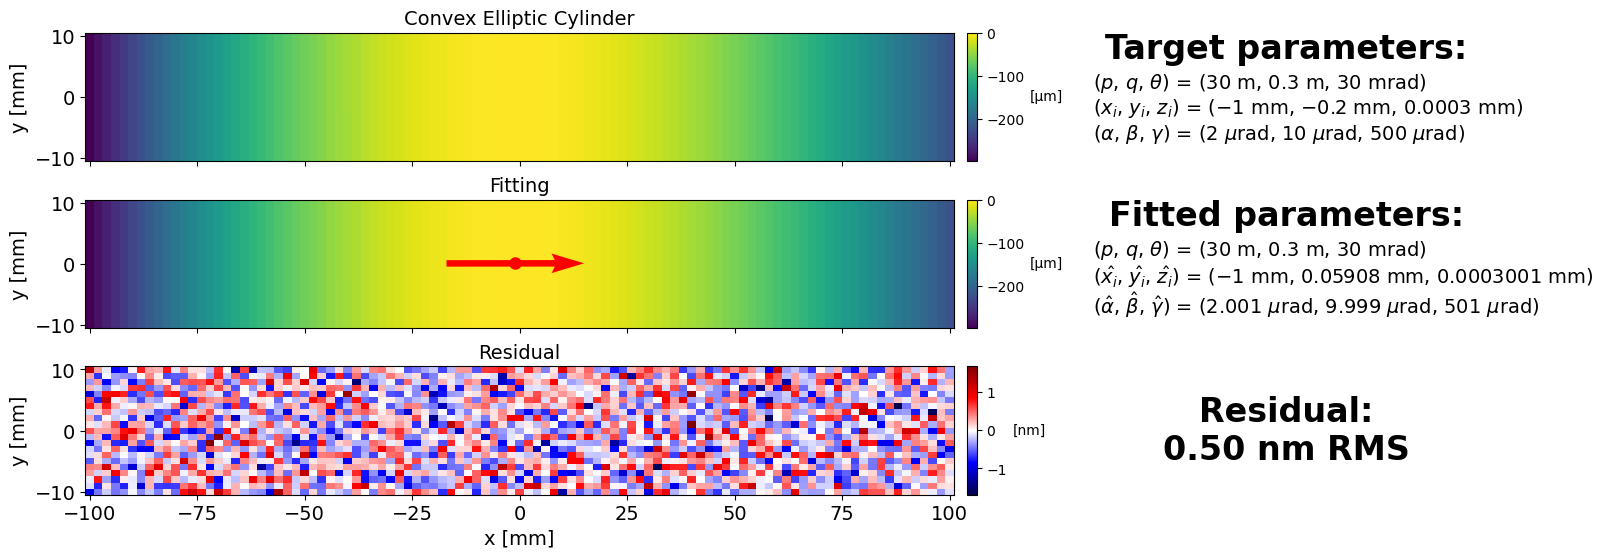

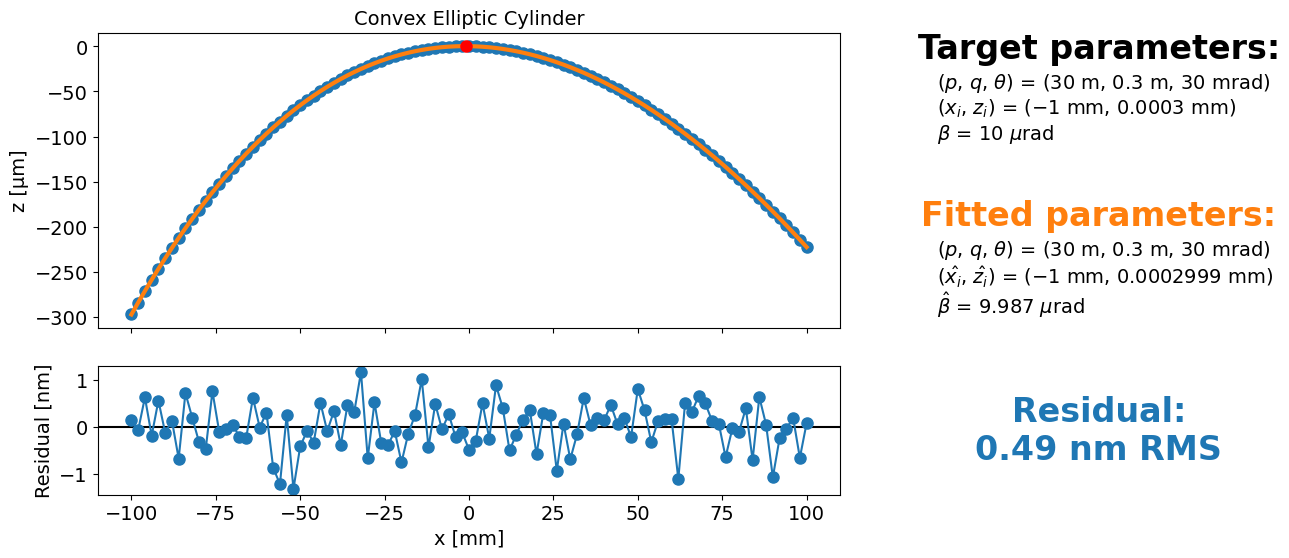

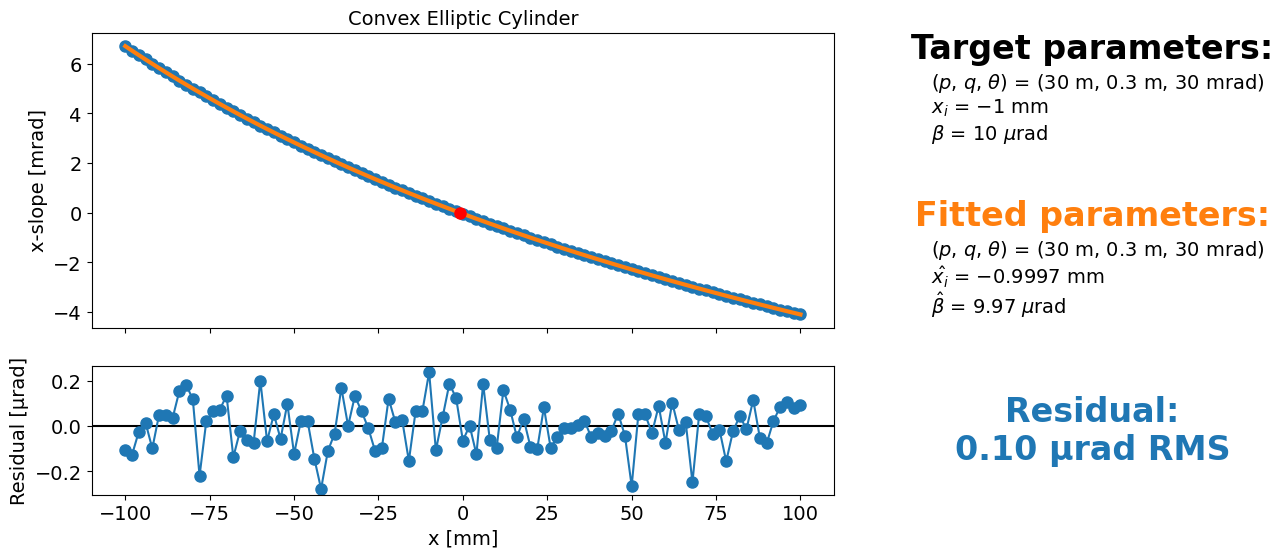

In [5]:
## 3.1. Convex Elliptic Cylinder (CVXEC)

z2d = xmf.generate_2d_cylinder_height(xmf.standard_convex_elliptic_cylinder_height, x2d, y2d, abs_p, abs_q, theta, x_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_elliptic_cylinder_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Elliptic Cylinder') 

z1d = xmf.generate_1d_height(xmf.standard_convex_elliptic_cylinder_height, x1d, abs_p, abs_q, theta, x_i, z_i, beta) 
z1d_measured = z1d + np.random.randn(z1d.shape[0])*height_measurement_noise_std 
z1d_res, z1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_ellipse_height(x1d, z1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_height(x1d, z1d_measured, z1d_fit, z1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Elliptic Cylinder') 

sx1d = xmf.generate_1d_slope(xmf.standard_convex_elliptic_cylinder_xslope, x1d, abs_p, abs_q, theta, x_i, beta) 
sx1d_measured = sx1d + np.random.randn(sx1d.shape[0])*slope_measurement_noise_std 
sx1d_res, sx1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_ellipse_slope(x1d, sx1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_slope(x1d, sx1d_measured, sx1d_fit, sx1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Elliptic Cylinder') 

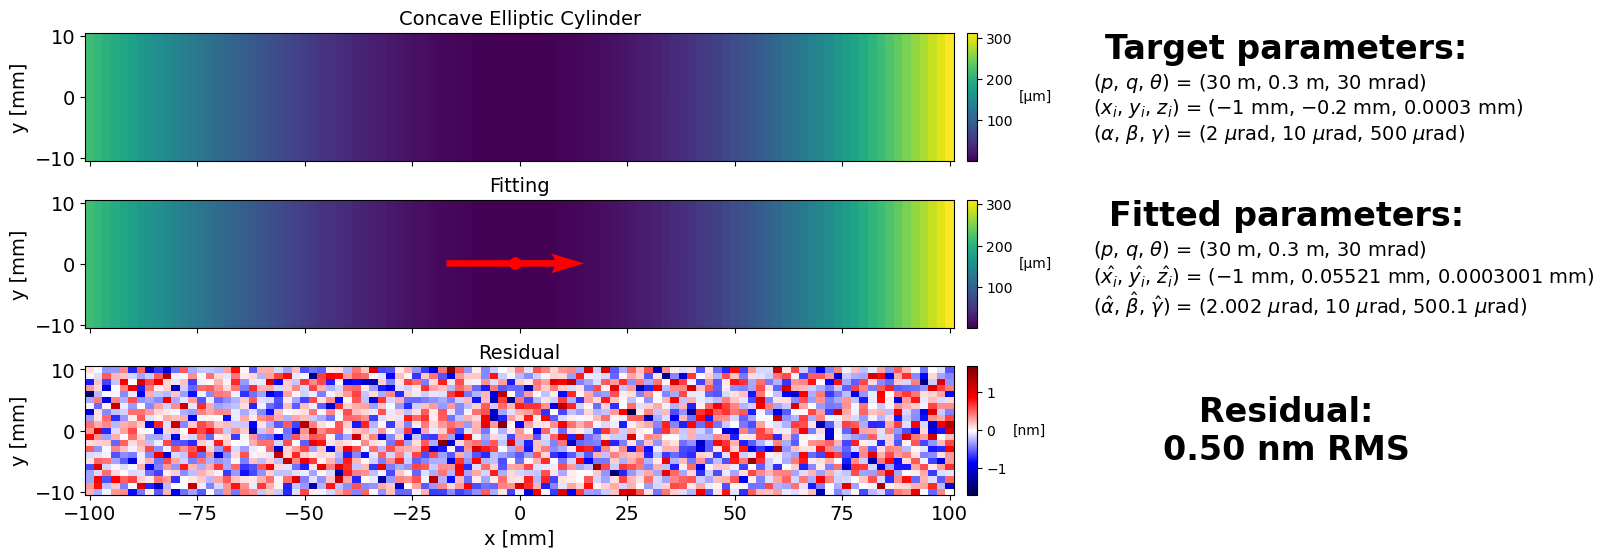

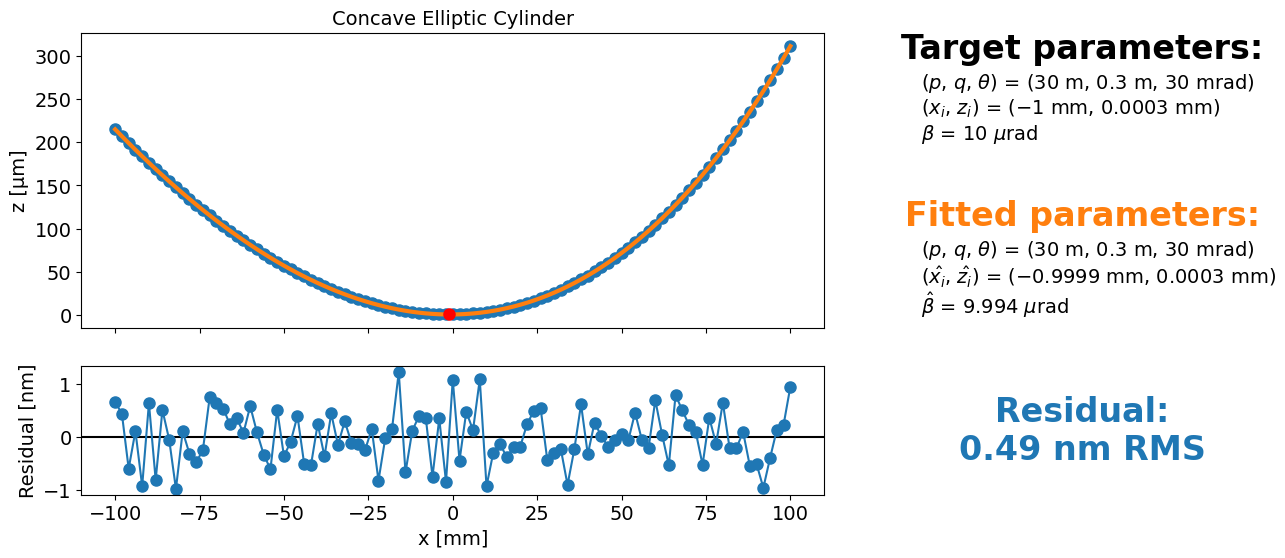

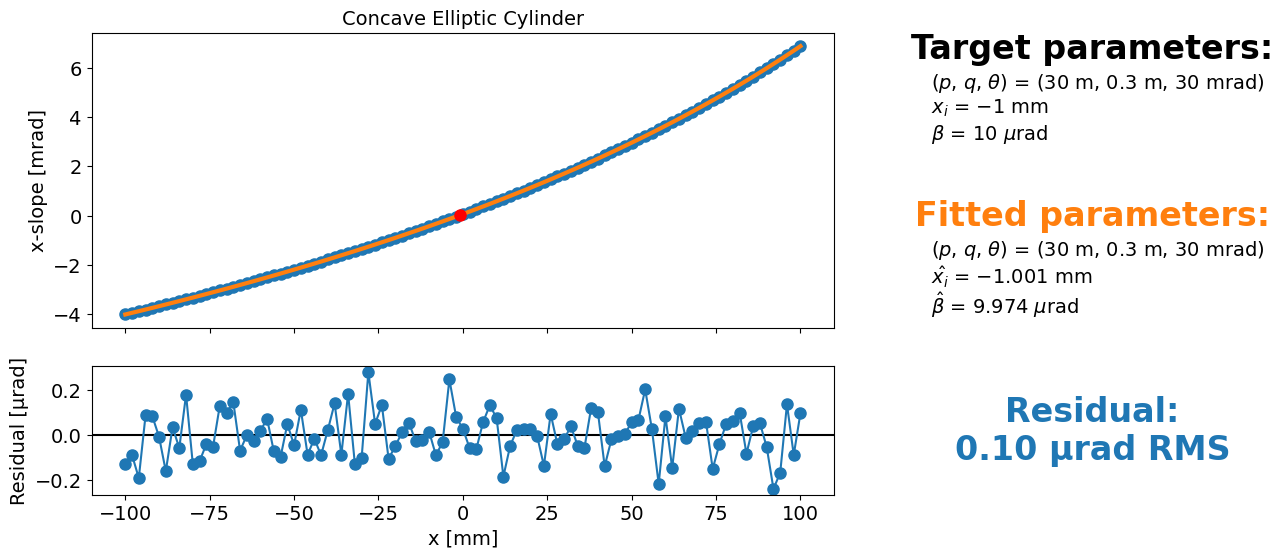

In [6]:
## 3.2. Concave Elliptic Cylinder (CCVEC)

z2d = xmf.generate_2d_cylinder_height(xmf.standard_concave_elliptic_cylinder_height, x2d, y2d, abs_p, abs_q, theta, x_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_elliptic_cylinder_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Concave Elliptic Cylinder') 

z1d = xmf.generate_1d_height(xmf.standard_concave_elliptic_cylinder_height, x1d, abs_p, abs_q, theta, x_i, z_i, beta) 
z1d_measured = z1d + np.random.randn(z1d.shape[0])*height_measurement_noise_std 
z1d_res, z1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_ellipse_height(x1d, z1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_height(x1d, z1d_measured, z1d_fit, z1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Concave Elliptic Cylinder') 

sx1d = xmf.generate_1d_slope(xmf.standard_concave_elliptic_cylinder_xslope, x1d, abs_p, abs_q, theta, x_i, beta) 
sx1d_measured = sx1d + np.random.randn(sx1d.shape[0])*slope_measurement_noise_std 
sx1d_res, sx1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_ellipse_slope(x1d, sx1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_slope(x1d, sx1d_measured, sx1d_fit, sx1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Concave Elliptic Cylinder') 


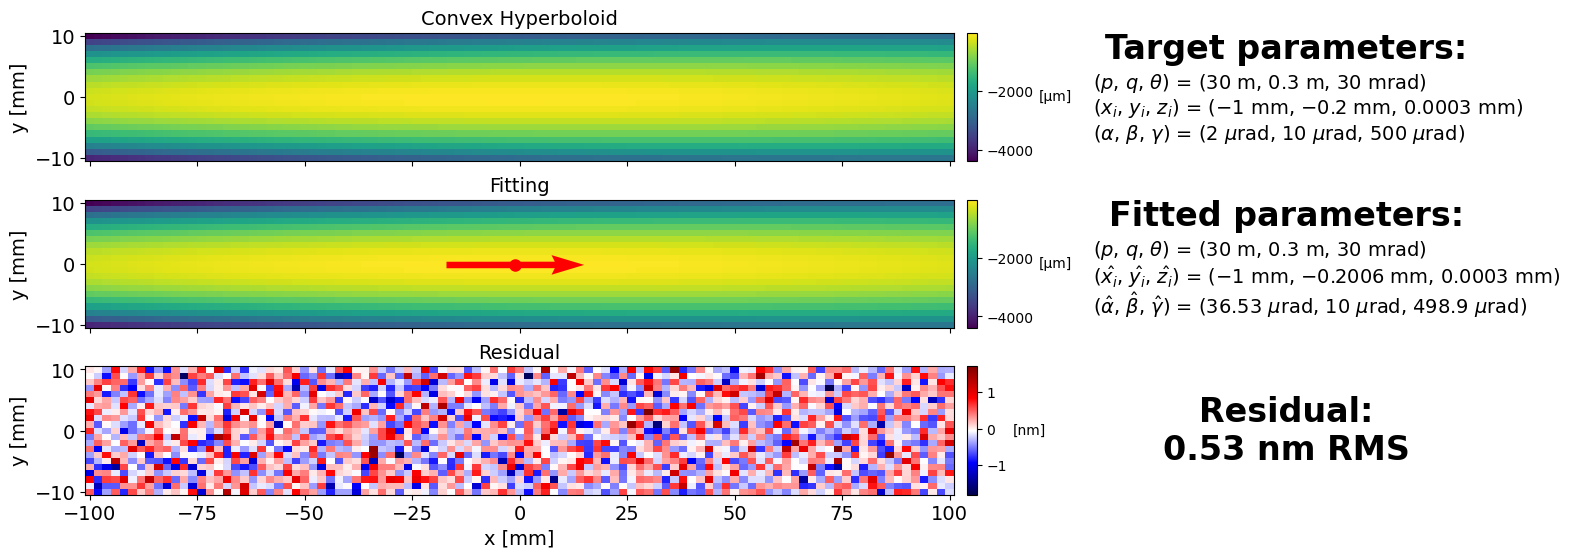

In [7]:
## 6.1. Convex Hyperboloid (CVXH)

z2d = xmf.generate_2d_curved_surface_height(xmf.standard_convex_hyperboloid_height, x2d, y2d, abs_p, abs_q, theta, x_i, y_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_hyperboloid_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Hyperboloid') 

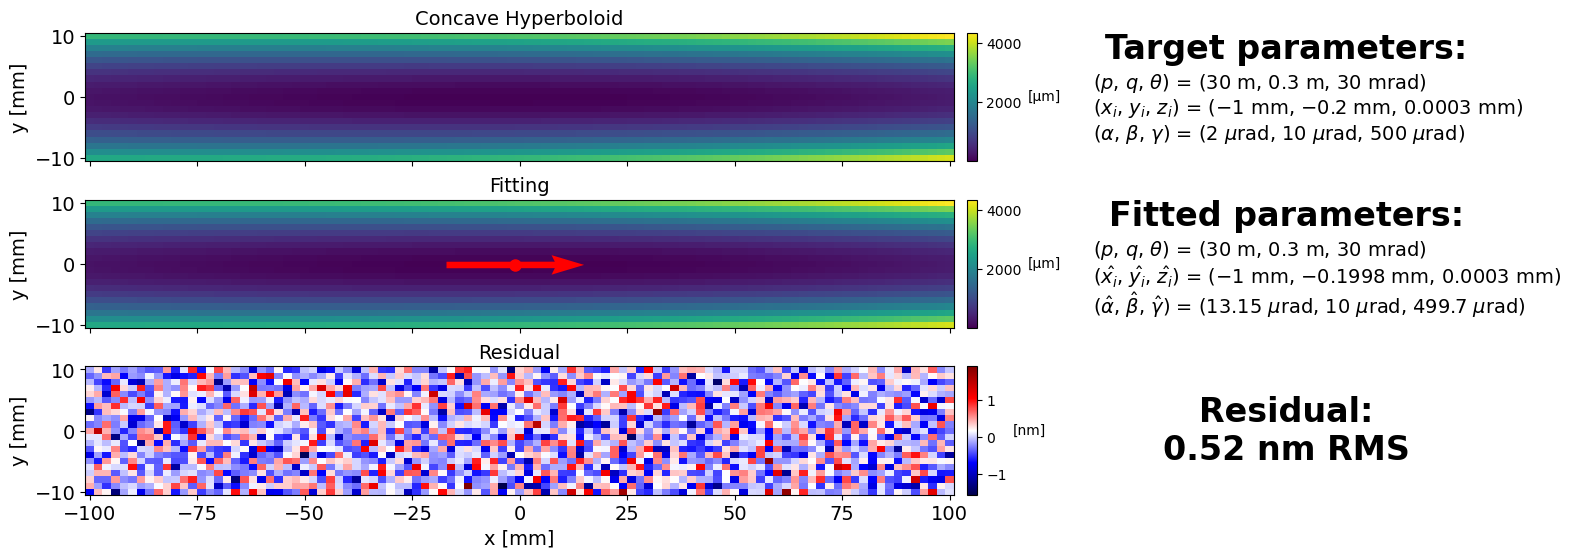

In [8]:
## 6.2. Concave Hyperboloid (CCVH)

z2d = xmf.generate_2d_curved_surface_height(xmf.standard_concave_hyperboloid_height, x2d, y2d, abs_p, abs_q, theta, x_i, y_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_hyperboloid_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Concave Hyperboloid') 

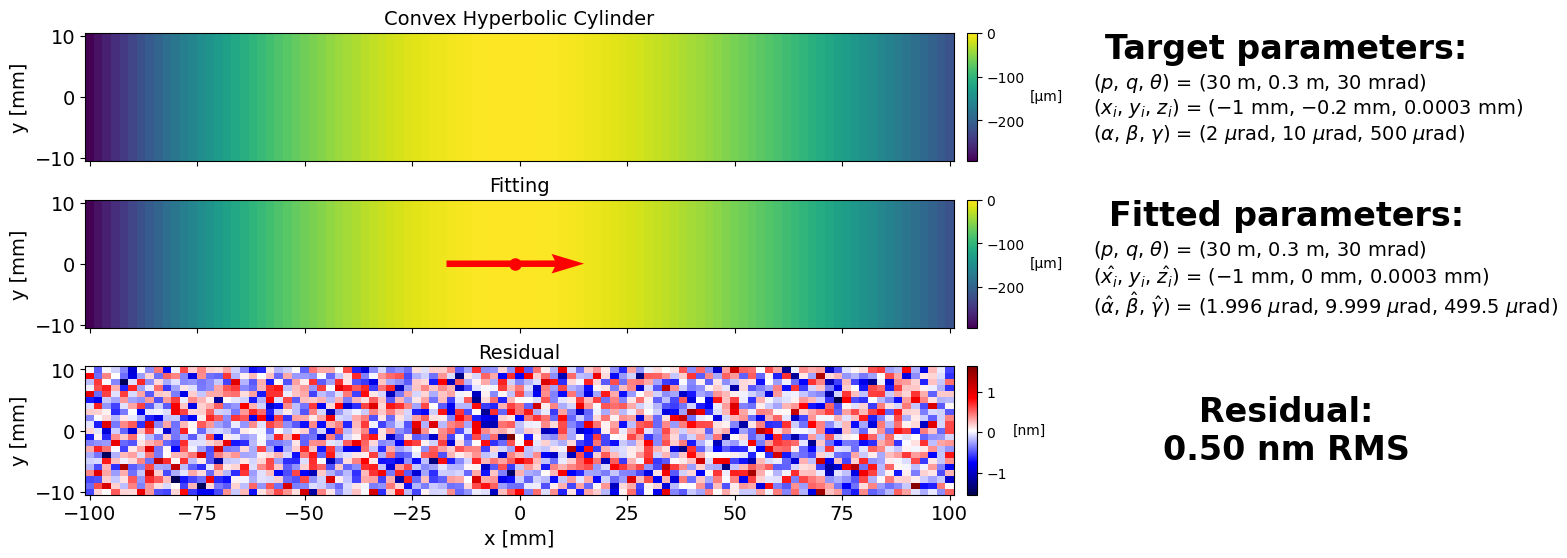

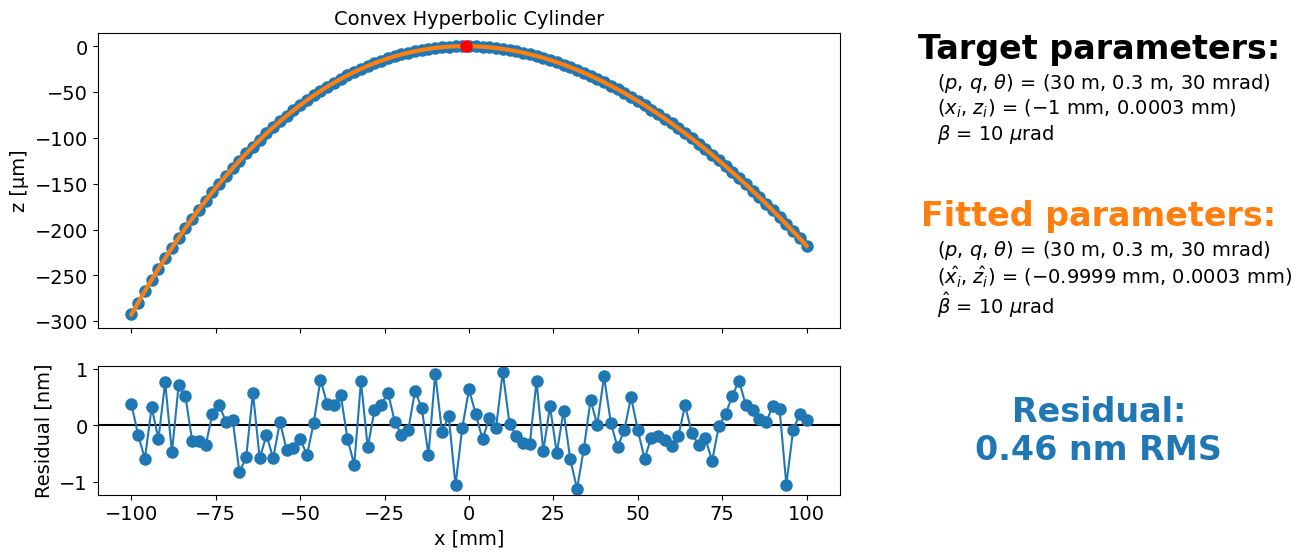

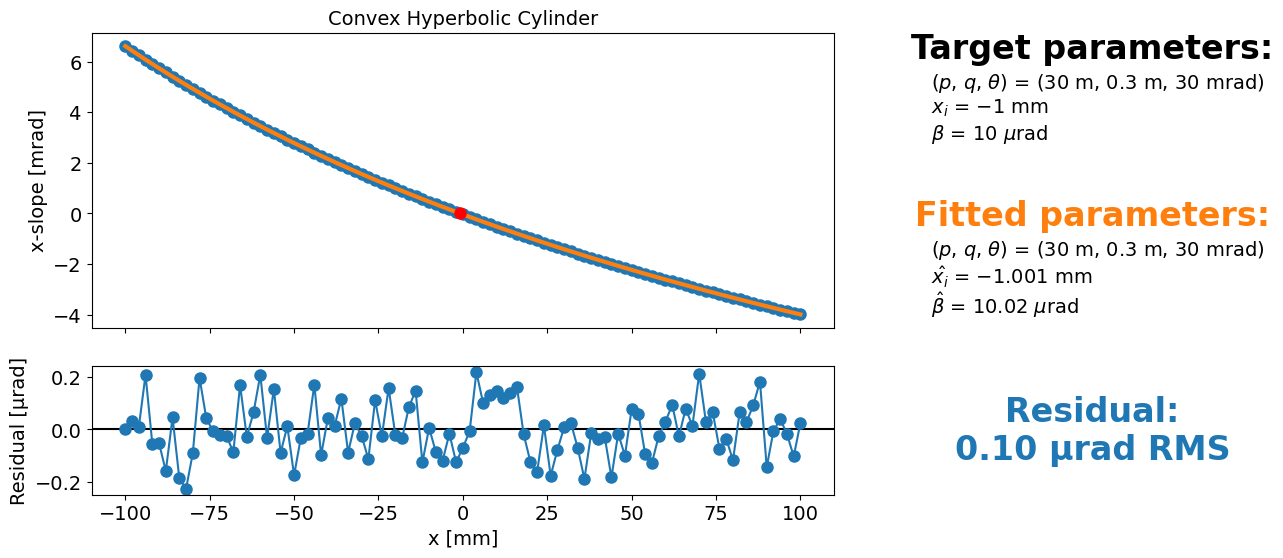

In [9]:
## 7.1. Convex Hyperbolic Cylinder (CVXHC)

z2d = xmf.generate_2d_cylinder_height(xmf.standard_convex_hyperbolic_cylinder_height, x2d, y2d, abs_p, abs_q, theta, x_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_hyperbolic_cylinder_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Hyperbolic Cylinder') 

z1d = xmf.generate_1d_height(xmf.standard_convex_hyperbolic_cylinder_height, x1d, abs_p, abs_q, theta, x_i, z_i, beta) 
z1d_measured = z1d + np.random.randn(z1d.shape[0])*height_measurement_noise_std 
z1d_res, z1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_hyperbola_height(x1d, z1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_height(x1d, z1d_measured, z1d_fit, z1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Hyperbolic Cylinder') 

sx1d = xmf.generate_1d_slope(xmf.standard_convex_hyperbolic_cylinder_xslope, x1d, abs_p, abs_q, theta, x_i, beta) 
sx1d_measured = sx1d + np.random.randn(sx1d.shape[0])*slope_measurement_noise_std 
sx1d_res, sx1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_convex_hyperbola_slope(x1d, sx1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_slope(x1d, sx1d_measured, sx1d_fit, sx1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Hyperbolic Cylinder') 


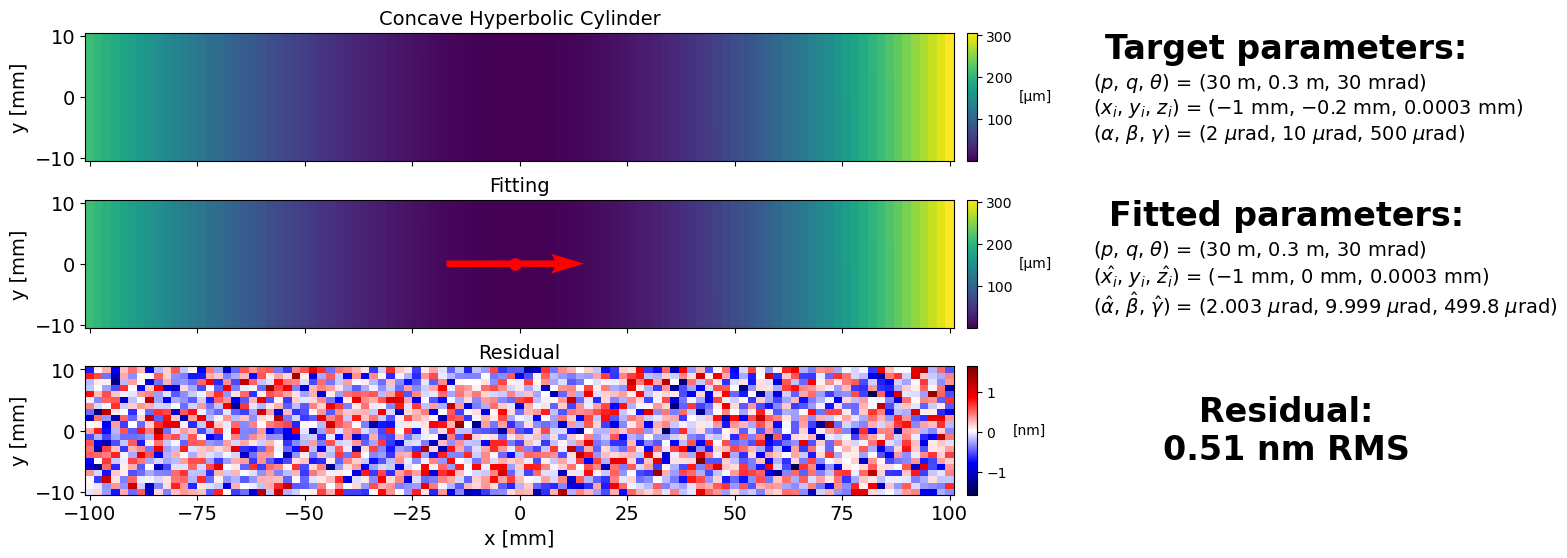

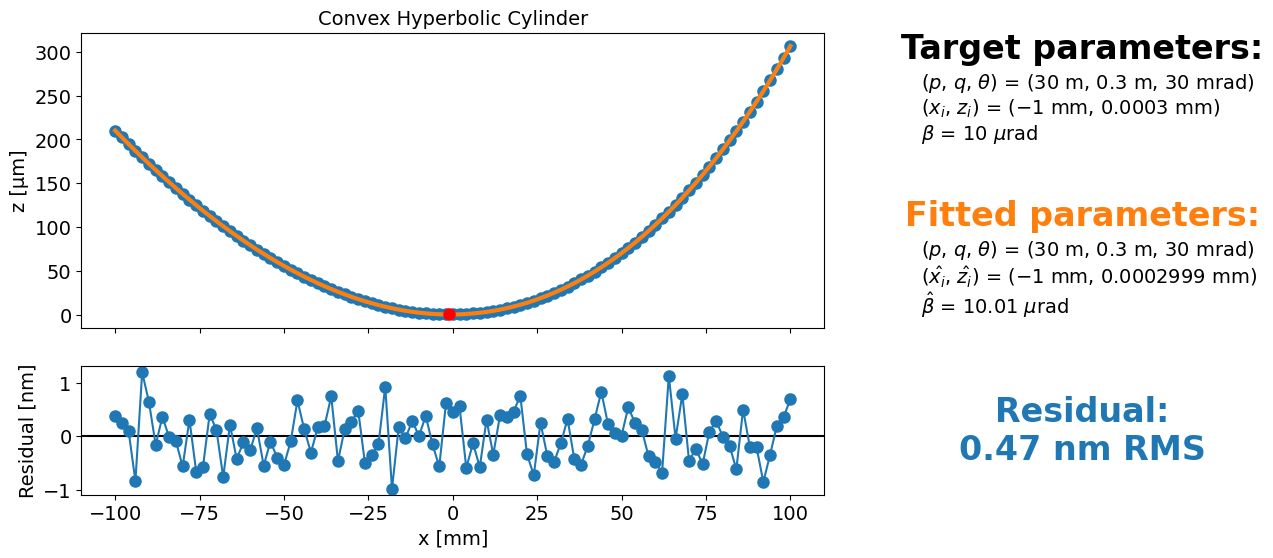

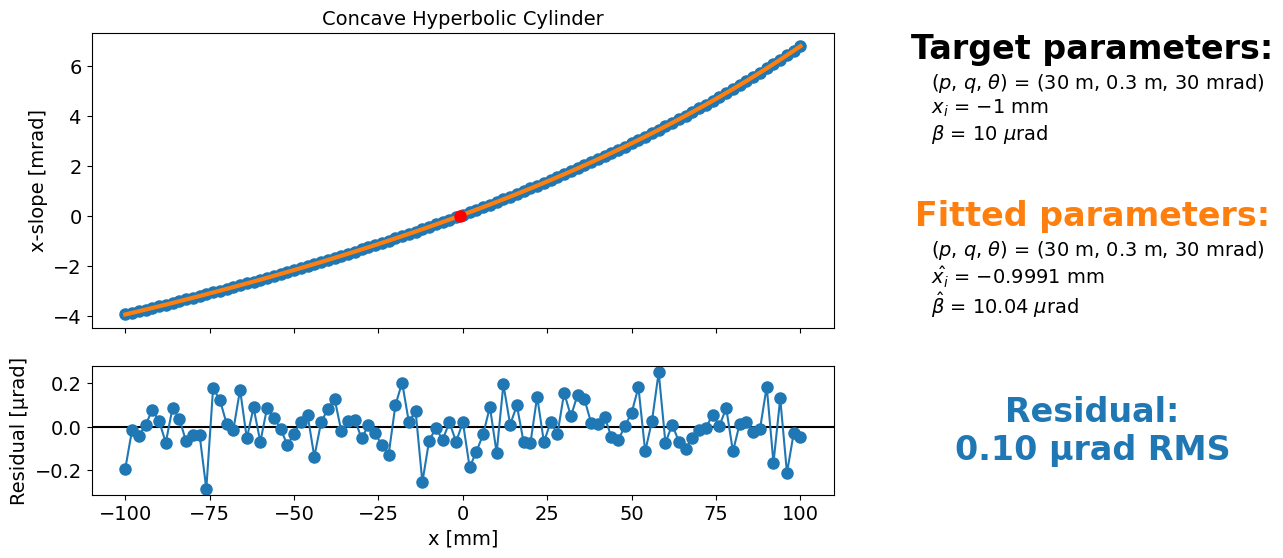

In [10]:
## 7.2. Concave Hyperbolic Cylinder (CCVHC)

z2d = xmf.generate_2d_cylinder_height(xmf.standard_concave_hyperbolic_cylinder_height, x2d, y2d, abs_p, abs_q, theta, x_i, z_i, alpha, beta, gamma) 
z2d_measured = z2d + np.random.randn(z2d.shape[0], z2d.shape[1])*height_measurement_noise_std 
z2d_res, z2d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_hyperbolic_cylinder_height(x2d, y2d, z2d_measured, input_params_dict, tol_dict) 
xmf.fig_show_2d_fitting_maps(x2d, y2d, z2d_measured, z2d_fit, z2d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Concave Hyperbolic Cylinder') 

z1d = xmf.generate_1d_height(xmf.standard_concave_hyperbolic_cylinder_height, x1d, abs_p, abs_q, theta, x_i, z_i, beta) 
z1d_measured = z1d + np.random.randn(z1d.shape[0])*height_measurement_noise_std 
z1d_res, z1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_hyperbola_height(x1d, z1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_height(x1d, z1d_measured, z1d_fit, z1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Convex Hyperbolic Cylinder') 

sx1d = xmf.generate_1d_slope(xmf.standard_concave_hyperbolic_cylinder_xslope, x1d, abs_p, abs_q, theta, x_i, beta) 
sx1d_measured = sx1d + np.random.randn(sx1d.shape[0])*slope_measurement_noise_std 
sx1d_res, sx1d_fit, opt_params_dict, opt_params_ci_dict, _ = xmf.fit_concave_hyperbola_slope(x1d, sx1d_measured, input_params_dict, tol_dict) 
xmf.fig_show_1d_fitting_slope(x1d, sx1d_measured, sx1d_fit, sx1d_res, true_params_dict, opt_params_dict, opt_params_ci_dict, 'Concave Hyperbolic Cylinder') 
